# Descripcion del dataset - SkillCraft 
### "Video Game Telemetry as a Critical Tool in the Study of Complex Skill Learning", (Tomphson et al., 2013).

El aprendisaje y desarrollo de habilidades que diferencian a una persona novata de un experto es un proceso complejo. Algunas habilidades pueden ser entrenadas en cortos periodos tiempo (tareas simples), mientras que otras requieren un alto esfuerzo motor y cognitivo para ser llevadas a cabo. Dependiendo de los distintos niveles en los que uno podria clasificar a la persona en funcion de su habilidad para una tarea (novato, intermedio, avanzado, profecional, etc), ciertas variables involucradas en la realizacion de la tarea tendran mayor o menor relevancia para la transicion entre las diferentes etapas de aprendisaje. StarcraftII es un juego de estrategia altamente complejo, con diferentes aspectos a tener en cuenta para ganarle al adversario. Este dataset posee el analisis de 2500 jugadores de Starcraft, clasificados en diferentes categorias (ligas) en las que juegan normalente. Del analisis de este dataset se podrian responder ciertas preguntas especificas al proceso de aprendisaje:

* En el proceso de aprendisaje de una tarea, todas las habilidades involucradas mejoran a la misma tasa?

* Todas las habilidades tienen el mismo peso en el proceso de aprendisaje o existen algunas que permiten grandes saltos?

y otras referidas al juego en si:

* Que caracteristicas poseen los diferentes jugadores de Starcraft de las distintas ligas?

* Se puede predicir la liga de un jugador en funcion de la telemetria de sus partidas?

In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv("SkillCraft1_Dataset.csv",encoding = "latin")
df.head(2500)

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,52,5,27,10,3000,143.7180,0.003515,0.000220,7,0.000110,0.000392,0.004849,32.6677,40.8673,4.7508,28,0.001397,6,0.000000,0.000000
1,55,5,23,10,5000,129.2322,0.003304,0.000259,4,0.000294,0.000432,0.004307,32.9194,42.3454,4.8434,22,0.001193,5,0.000000,0.000208
2,56,4,30,10,200,69.9612,0.001101,0.000336,4,0.000294,0.000461,0.002926,44.6475,75.3548,4.0430,22,0.000745,6,0.000000,0.000189
3,57,3,19,20,400,107.6016,0.001034,0.000213,1,0.000053,0.000543,0.003783,29.2203,53.7352,4.9155,19,0.000426,7,0.000000,0.000384
4,58,3,32,10,500,122.8908,0.001136,0.000327,2,0.000000,0.001329,0.002368,22.6885,62.0813,9.3740,15,0.001174,4,0.000000,0.000019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,6976,4,22,4,730,113.9184,0.002900,0.000214,8,0.000051,0.000368,0.003515,28.3415,69.8102,5.1971,28,0.000624,7,0.000000,0.000000
2496,6978,2,19,8,100,54.0606,0.000028,0.000028,1,0.000000,0.000057,0.002933,93.6078,83.0680,3.1553,14,0.000541,5,0.000000,0.000000
2497,6979,6,22,28,1400,113.8680,0.003547,0.000147,3,0.000000,0.000294,0.002520,40.8235,55.1456,7.4563,8,0.001150,3,0.000000,0.000122
2498,6980,6,20,6,125,275.7342,0.013411,0.000831,6,0.000199,0.000684,0.006892,12.3723,28.8191,5.7990,30,0.001160,8,0.000234,0.001030


## DATA CLEANNING

In [140]:
df=df.drop('GameID', axis=1)
df = df.replace('?', np.nan) 
df[["Age","HoursPerWeek","TotalHours"]] = df[["Age","HoursPerWeek","TotalHours"]].apply(pd.to_numeric)
print(df.columns)
print(df.dtypes) # All numeric variables

Index(['LeagueIndex', 'Age', 'HoursPerWeek', 'TotalHours', 'APM',
       'SelectByHotkeys', 'AssignToHotkeys', 'UniqueHotkeys', 'MinimapAttacks',
       'MinimapRightClicks', 'NumberOfPACs', 'GapBetweenPACs', 'ActionLatency',
       'ActionsInPAC', 'TotalMapExplored', 'WorkersMade', 'UniqueUnitsMade',
       'ComplexUnitsMade', 'ComplexAbilitiesUsed'],
      dtype='object')
LeagueIndex               int64
Age                     float64
HoursPerWeek            float64
TotalHours              float64
APM                     float64
SelectByHotkeys         float64
AssignToHotkeys         float64
UniqueHotkeys             int64
MinimapAttacks          float64
MinimapRightClicks      float64
NumberOfPACs            float64
GapBetweenPACs          float64
ActionLatency           float64
ActionsInPAC            float64
TotalMapExplored          int64
WorkersMade             float64
UniqueUnitsMade           int64
ComplexUnitsMade        float64
ComplexAbilitiesUsed    float64
dtype: object


### Linear relationship between  features

<AxesSubplot:>

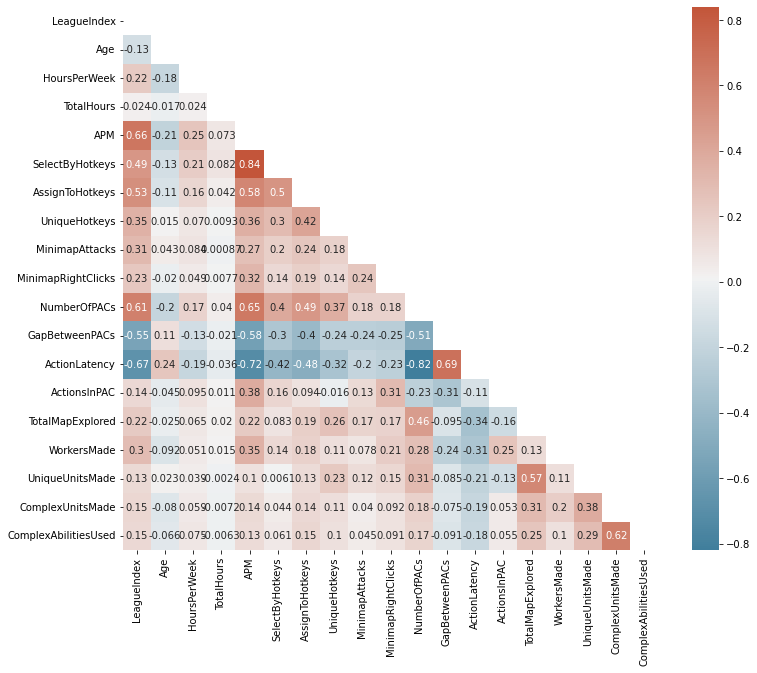

In [141]:
corr = df.corr()
f, ax = plt.subplots(figsize=(12, 10))
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

<AxesSubplot:>

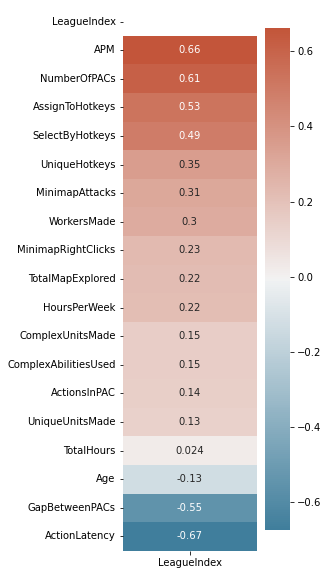

In [142]:
corr = df.corr()
x= corr[["LeagueIndex"]].sort_values(by ="LeagueIndex",ascending=False)
f, ax = plt.subplots(figsize=(3, 10))
mask = np.triu(np.ones_like(x, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(x, annot=True, mask = mask, cmap=cmap)

Llamativamente, ni la edad del jugador ni el tiempo total jugado parecen correlacionarse positivamente con la liga del jugador ni con las otras variables evaluadas. Sin embargo, el tiempo jugado por semana parece correlacionarse positivamente (0.21) con la liga del jugador 

### Describing other variables with possible nonlinear relationships


<AxesSubplot:xlabel='LeagueIndex', ylabel='HoursPerWeek'>

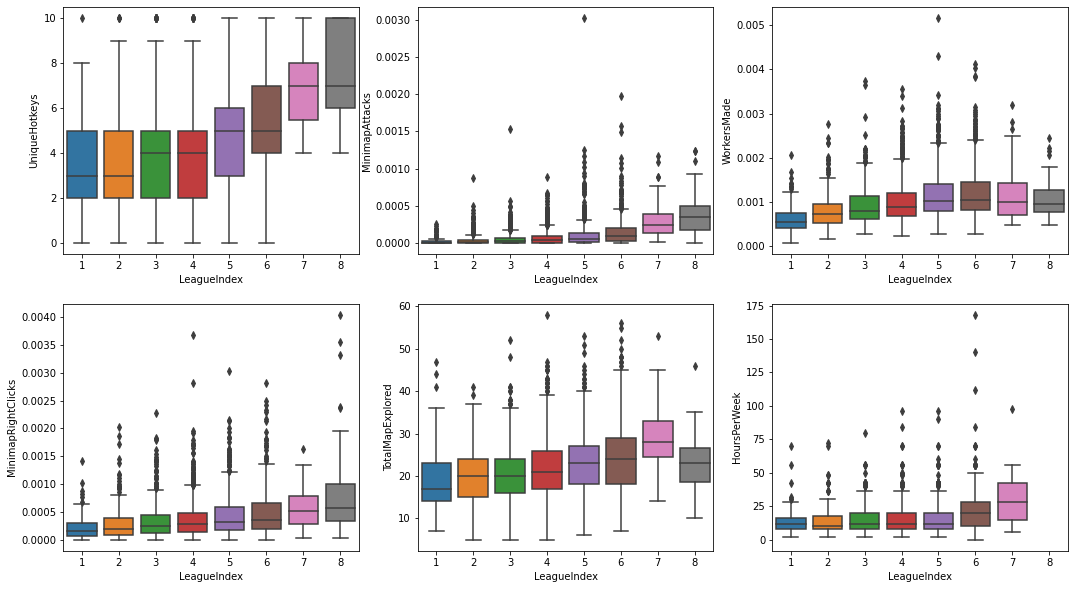

In [143]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
 
 
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
 

 
sns.boxplot(ax=axes[0, 0], data=df, x='LeagueIndex', y='UniqueHotkeys')
sns.boxplot(ax=axes[0, 1], data=df, x='LeagueIndex', y='MinimapAttacks')
sns.boxplot(ax=axes[0, 2], data=df, x='LeagueIndex', y='WorkersMade')
sns.boxplot(ax=axes[1, 0], data=df, x='LeagueIndex', y='MinimapRightClicks')
sns.boxplot(ax=axes[1, 1], data=df, x='LeagueIndex', y='TotalMapExplored')
sns.boxplot(ax=axes[1, 2], data=df, x='LeagueIndex', y='HoursPerWeek')


<AxesSubplot:xlabel='LeagueIndex', ylabel='Age'>

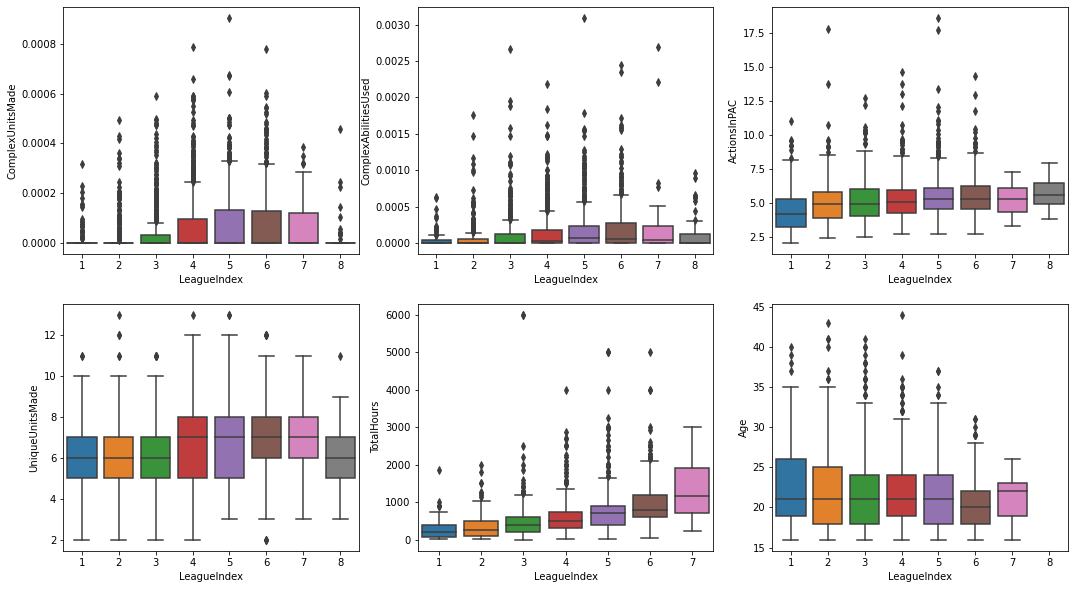

In [144]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
sns.boxplot(ax=axes[0, 0], data=df, x='LeagueIndex', y='ComplexUnitsMade')
sns.boxplot(ax=axes[0, 1], data=df, x='LeagueIndex', y='ComplexAbilitiesUsed')
sns.boxplot(ax=axes[0, 2], data=df, x='LeagueIndex', y='ActionsInPAC')
sns.boxplot(ax=axes[1, 0], data=df, x='LeagueIndex', y='UniqueUnitsMade')
sns.boxplot(ax=axes[1, 1], data=df[(df["TotalHours"]  < 7500)], x='LeagueIndex', y='TotalHours')
sns.boxplot(ax=axes[1, 2], data=df, x='LeagueIndex', y='Age')
 
                                  

### Como se relacionan las respuestas temporales con los jugadores de las diferentes ligas?
APM: Acciones por minuto //
ActionLatency: Mide el tiempo de reaccion ante un estimulo nuevo

<AxesSubplot:xlabel='ActionLatency', ylabel='APM'>

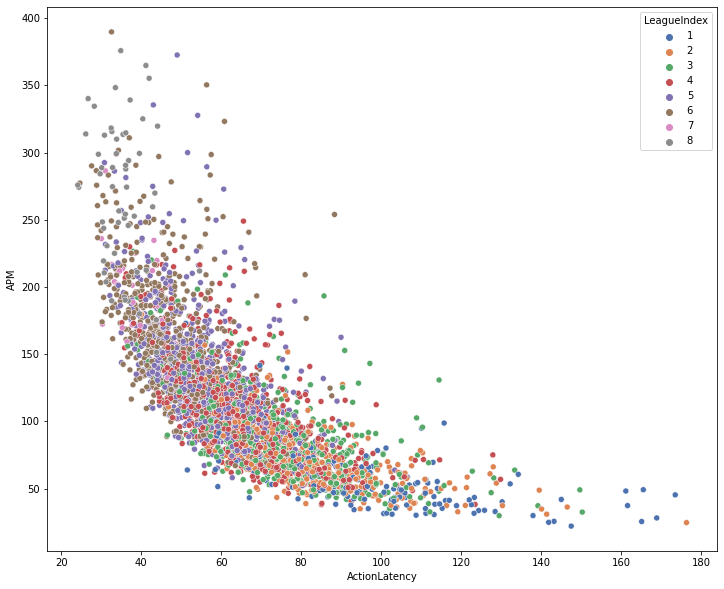

In [145]:
f, ax = plt.subplots(figsize=(12, 10))
sns.scatterplot(data=df, x="ActionLatency", y="APM", hue="LeagueIndex", palette="deep")


Esto sugiere que independientemente del numero de horas empleado,  el jugador debe entrenar ciertos aspectos especificos de su juego para subir o ser considerado de una categoria mayor.

Las categorias bajas estan asociadas a tiempos de latencia altos y numeros de acciones por minuto menores. Sin embargo, a partir de la 3 categoria, los jugadores presentan tiempos de respuestas a estimulos similares, sugiriendo que hay otros aspectos a tener en cuenta para la clasificacion y generacion de un futuro modelo predictivo. 

### IMPUTING MISSING DATA

In [154]:
from sklearn.impute import SimpleImputer

df=df_

imputer = SimpleImputer(strategy="median")

imputer.fit(df_)

X = imputer.transform(df_)

df_ = pd.DataFrame(X, columns=df.columns)

df_


,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,5.0,27.0,10.0,3000.0,143.7180,0.003515,0.000220,7.0,0.000110,0.000392,0.004849,32.6677,40.8673,4.7508,28.0,0.001397,6.0,0.000000,0.000000
1,5.0,23.0,10.0,5000.0,129.2322,0.003304,0.000259,4.0,0.000294,0.000432,0.004307,32.9194,42.3454,4.8434,22.0,0.001193,5.0,0.000000,0.000208
2,4.0,30.0,10.0,200.0,69.9612,0.001101,0.000336,4.0,0.000294,0.000461,0.002926,44.6475,75.3548,4.0430,22.0,0.000745,6.0,0.000000,0.000189
3,3.0,19.0,20.0,400.0,107.6016,0.001034,0.000213,1.0,0.000053,0.000543,0.003783,29.2203,53.7352,4.9155,19.0,0.000426,7.0,0.000000,0.000384
4,3.0,32.0,10.0,500.0,122.8908,0.001136,0.000327,2.0,0.000000,0.001329,0.002368,22.6885,62.0813,9.3740,15.0,0.001174,4.0,0.000000,0.000019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3390,8.0,21.0,12.0,500.0,259.6296,0.020425,0.000743,9.0,0.000621,0.000146,0.004555,18.6059,42.8342,6.2754,46.0,0.000877,5.0,0.000000,0.000000
3391,8.0,21.0,12.0,500.0,314.6700,0.028043,0.001157,10.0,0.000246,0.001083,0.004259,14.3023,36.1156,7.1965,16.0,0.000788,4.0,0.000000,0.000000
3392,8.0,21.0,12.0,500.0,299.4282,0.028341,0.000860,7.0,0.000338,0.000169,0.004439,12.4028,39.5156,6.3979,19.0,0.001260,4.0,0.000000,0.000000
3393,8.0,21.0,12.0,500.0,375.8664,0.036436,0.000594,5.0,0.000204,0.000780,0.004346,11.6910,34.8547,7.9615,15.0,0.000613,6.0,0.000000,0.000631


## Development of an algorithm for players classification 

In [155]:
from sklearn.model_selection import StratifiedShuffleSplit

stratified_ShuffleSplit = StratifiedShuffleSplit(n_splits=1, test_size=0.2,random_state=42) 

for train_index, test_index in stratified_ShuffleSplit.split(df_,df_["LeagueIndex"]):
    train_set = df_.loc[train_index]
    test_set = df_.loc[test_index]



In [156]:
train_set.head()

,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
239,3.0,20.0,20.0,500.0,133.8408,0.004806,0.000397,1.0,0.000031,0.000334,0.004232,33.6436,47.2494,5.0049,31.0,0.000972,7.0,0.000303,0.000031
2875,5.0,22.0,12.0,500.0,124.0110,0.004002,0.000440,4.0,0.000023,0.000197,0.003875,23.4251,56.7522,5.3463,28.0,0.001053,10.0,0.000104,0.000671
2358,4.0,22.0,6.0,500.0,126.3222,0.001503,0.000501,3.0,0.000200,0.000326,0.003482,30.2319,62.6187,6.2950,17.0,0.000777,5.0,0.000000,0.000000
2185,6.0,16.0,14.0,600.0,139.8240,0.007269,0.000373,5.0,0.000050,0.000921,0.003610,43.8611,61.9862,5.1241,9.0,0.000797,4.0,0.000000,0.000000
884,5.0,18.0,56.0,1650.0,184.2078,0.009488,0.000387,3.0,0.000029,0.001333,0.003612,20.8924,54.3175,7.4087,24.0,0.001405,6.0,0.000344,0.001247


### Decision Tree 



In [202]:
from sklearn.model_selection import GridSearchCV


param_grid = [
{'max_depth': [3, 5, 10], 'min_samples_split': [10, 20, 40, 80], "min_samples_leaf": [10, 20, 40, 80]}
]

decision_tree = DecisionTreeClassifier()

grid_search = GridSearchCV(decision_tree, param_grid, cv=5,
scoring='accuracy',
return_train_score=True)

features_df_ = train_set.iloc[:,1:]

labels_df_=train_set.iloc[:,0]


grid_search.fit(features_df_, labels_df_)

grid_search.best_params_

{'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 20}

In [203]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz

X =train_set.iloc[:,1:]
y= train_set.iloc[:,0]

tree_clf = DecisionTreeClassifier(max_depth=5, min_samples_leaf=10,min_samples_split=20)
tree_clf.fit(X, y)



DecisionTreeClassifier(max_depth=5, min_samples_leaf=10, min_samples_split=20)

In [224]:


columns_name = df_.iloc[:,1:].columns
target_names = df_.iloc[:,0].unique()
target_names = target_names.sort()



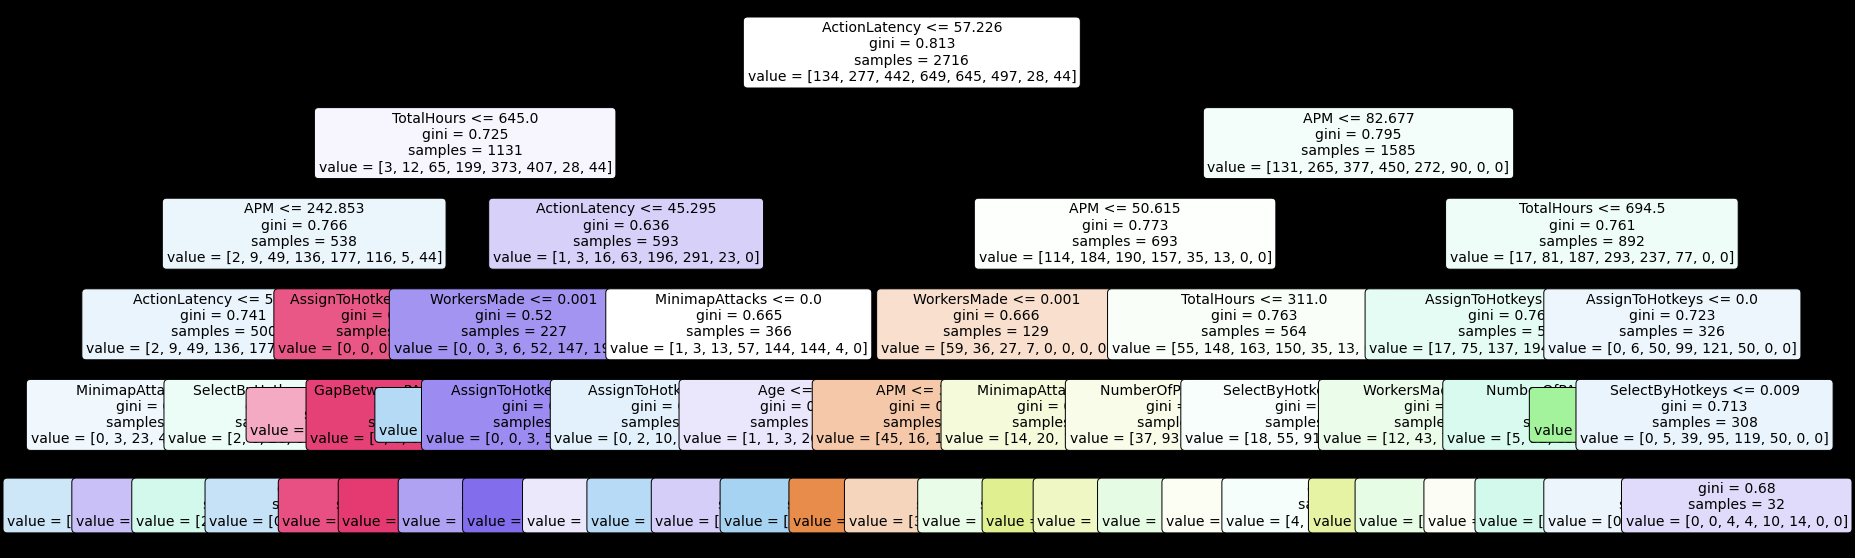

In [223]:
plt.figure(figsize=(30,10), facecolor ='k')
#create the tree plot
a = tree.plot_tree(tree_clf,
                   #use the feature names stored
                   feature_names = fn,
                   #use the class names stored
                   class_names = cn,
                   rounded = True,
                   filled = True,
                   fontsize=14)
#show the plot
plt.show()

In [233]:
print(cn)

None


In [222]:
feature_importance = tree_clf.feature_importances_
tree_clf_importance_features = pd.Series(feature_importance,index=columns_names)
tree_clf_importance_features.sort_values()

#tree_clf_importance_features

MinimapRightClicks      0.000000
UniqueUnitsMade         0.000000
TotalMapExplored        0.000000
ActionsInPAC            0.000000
ComplexUnitsMade        0.000000
UniqueHotkeys           0.000000
ComplexAbilitiesUsed    0.000000
HoursPerWeek            0.000000
GapBetweenPACs          0.000318
Age                     0.009059
NumberOfPACs            0.030855
WorkersMade             0.036735
SelectByHotkeys         0.037172
MinimapAttacks          0.040856
AssignToHotkeys         0.063223
TotalHours              0.131874
APM                     0.254298
ActionLatency           0.395610
dtype: float64

In [226]:
from sklearn.tree import export_text

tree_rules = export_text(tree_clf,
                        feature_names = list(fn))

print(tree_rules)

|--- ActionLatency <= 57.23
|   |--- TotalHours <= 645.00
|   |   |--- APM <= 242.85
|   |   |   |--- ActionLatency <= 50.78
|   |   |   |   |--- MinimapAttacks <= 0.00
|   |   |   |   |   |--- class: 5.0
|   |   |   |   |--- MinimapAttacks >  0.00
|   |   |   |   |   |--- class: 6.0
|   |   |   |--- ActionLatency >  50.78
|   |   |   |   |--- SelectByHotkeys <= 0.01
|   |   |   |   |   |--- class: 4.0
|   |   |   |   |--- SelectByHotkeys >  0.01
|   |   |   |   |   |--- class: 5.0
|   |   |--- APM >  242.85
|   |   |   |--- AssignToHotkeys <= 0.00
|   |   |   |   |--- class: 8.0
|   |   |   |--- AssignToHotkeys >  0.00
|   |   |   |   |--- GapBetweenPACs <= 15.89
|   |   |   |   |   |--- class: 8.0
|   |   |   |   |--- GapBetweenPACs >  15.89
|   |   |   |   |   |--- class: 8.0
|   |--- TotalHours >  645.00
|   |   |--- ActionLatency <= 45.30
|   |   |   |--- WorkersMade <= 0.00
|   |   |   |   |--- class: 5.0
|   |   |   |--- WorkersMade >  0.00
|   |   |   |   |--- AssignToHotkeys <

### Evaluation on test set

In [227]:
test_features =test_set.iloc[:,1:]
test_labels = test_set.iloc[:,0]
test_pred_decision_tree = tree_clf.predict(test_features)

In [255]:
target_names = [1,2,3,4,5,6,7,8]


ValueError: The number of FixedLocator locations (8), usually from a call to set_ticks, does not match the number of ticklabels (9).

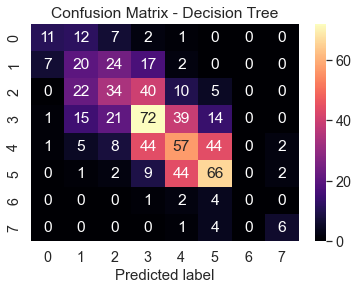

<Figure size 720x504 with 0 Axes>

In [256]:
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt#get the confusion matrix
confusion_matrix = metrics.confusion_matrix(test_labels,  
                                            test_pred_decision_tree)#turn this into a dataframe
matrix_df = pd.DataFrame(confusion_matrix)#plot the result
ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(10,7))
sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="magma")#set axis titles
ax.set_title('Confusion Matrix - Decision Tree')
ax.set_xlabel("Predicted label", fontsize =15)
ax.set_xticklabels(['']+target_names)
ax.set_ylabel("True Label", fontsize=15)
ax.set_yticklabels(list(target_names), rotation = 0)
plt.show()

In [257]:
print(metrics.classification_report(test_labels,
                                    test_pred_decision_tree))

              precision    recall  f1-score   support

         1.0       0.55      0.33      0.42        33
         2.0       0.27      0.29      0.28        70
         3.0       0.35      0.31      0.33       111
         4.0       0.39      0.44      0.41       162
         5.0       0.37      0.35      0.36       161
         6.0       0.48      0.53      0.51       124
         7.0       0.00      0.00      0.00         7
         8.0       0.60      0.55      0.57        11

    accuracy                           0.39       679
   macro avg       0.38      0.35      0.36       679
weighted avg       0.39      0.39      0.39       679



C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
